In [13]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
%load_ext autoreload
%autoreload 2

import pandas as pd
from experiment_data import get_experiment_data
from settings import DATA_FOLDER
from utils import display_creative_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = get_experiment_data()

users_df size before removing small experiments: 501008 rows
users_df size after removing small experiments: 500953 rows


How many clicks there are for each variation?

In [6]:
data["CLICK"].value_counts()

CLICK
0.5    1965846
0.0     455454
1.0      47357
Name: count, dtype: int64

In [10]:
# Group all experiments in ascending order by their date, for each experiment count the number of clicks in each variation
experiment_variation_clicks = (
    data.query("CLICK == 1")
    .groupby(["EXPERIMENT_ID", "EXPERIMENT_DATE", "VARIATION_ID"])
    ["CLICK"].sum()
    .reset_index()
    .sort_values(["EXPERIMENT_DATE", "EXPERIMENT_ID"])
)
experiment_variation_clicks.set_index(["EXPERIMENT_DATE", "EXPERIMENT_ID"])



VARIATION_ID  \
EXPERIMENT_DATE EXPERIMENT_ID                                                                
2025-07-01      8ea67496-0fb3-4efd-8cea-4b8d88351b8e  2be67f2a-ea10-4a35-8820-249b4a3ad42d   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  77a21e82-ef9f-458f-99ac-312f9a7a7a5c   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  7eb1781e-7042-4282-9a6d-cac182b095b0   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  b83a2f5a-c59f-41ed-84e3-c88ef2cc95c1   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  ff1592ba-8297-4a6f-bf29-105456db6ca3   
...                                                                                    ...   
2025-10-02      78a802ae-d6cd-4f39-aecb-138668fa2607  e4a621d7-bc90-458b-8e21-92a679cbfeb7   
2025-10-06      0ef6d2e9-7601-4df6-a215-83e6e79aa24e  637fdd90-26ed-42aa-affd-b27e5955b4a4   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  c23f8cfd-1185-4513-aecf-a6f6eb0c3816   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  d33d584d-60a7-4b9d-8993-3d1b6786bc2d   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  ee313bd7-dea9-4fc7-ab7b-2cf9639e8b04   

                                                      CLICK  
EXPERIMENT_DATE EXPERIMENT_ID                                
2025-07-01      8ea67496-0fb3-4efd-8cea-4b8d88351b8e  639.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  226.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  139.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  440.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  322.0  
...                                                     ...  
2025-10-02      78a802ae-d6cd-4f39-aecb-138668fa2607  140.0  
2025-10-06      0ef6d2e9-7601-4df6-a215-83e6e79aa24e  210.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  258.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  438.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  387.0  

[127 rows x 2 columns]

In [11]:
# Sort experiments by date and count number of variations per experiment
experiment_variation_counts = (
    data.groupby(["EXPERIMENT_ID", "EXPERIMENT_DATE"])["VARIATION_ID"]
    .nunique()
    .reset_index(name="num_variations")
    .sort_values(["EXPERIMENT_DATE", "EXPERIMENT_ID"])
)
experiment_variation_counts.set_index(["EXPERIMENT_DATE", "EXPERIMENT_ID"])


,,num_variations
EXPERIMENT_DATE,EXPERIMENT_ID,
2025-07-01,8ea67496-0fb3-4efd-8cea-4b8d88351b8e,5
2025-07-10,81ae4870-e57d-4bc4-a2d7-48ffa5411707,5
2025-07-11,c5288ca2-3928-4364-8f08-bebc1036dd87,5
2025-07-14,3ecf34fc-1f15-4b32-970f-4061544da763,5
2025-07-17,00bb26ff-6fe3-4465-ac77-12bfc33aa6df,5
2025-07-22,6f506df9-be60-452d-b914-8230c29c2ff1,5
2025-07-26,44d26695-cdf2-41a4-b161-393fdaf964bc,5
2025-07-28,002deaf7-331f-4b5e-866b-f6dad60e4a79,5
2025-08-02,e4b4a349-3b14-439e-946f-f716101dac69,4


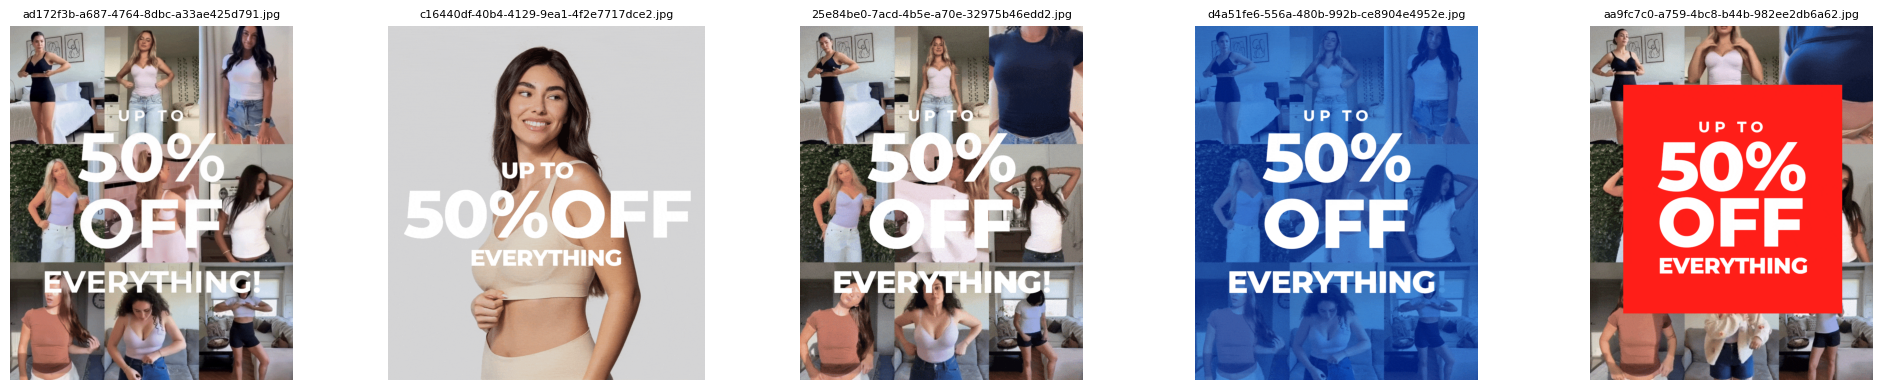

In [47]:
experiment_id = "9cd54b2b-31f9-43e4-9073-0d2b61bf9f15"
display_creative_image(experiment_id=experiment_id)

In [45]:
dataset = pd.read_csv(DATA_FOLDER / "dataset.csv")
image_names = dataset.query(f"experiment_id_creative=='{experiment_id}'")[["id", "image_name", "subject_line"]]
creative_feats = data.query(f"EXPERIMENT_ID == '{experiment_id}'").filter(regex="Q|(^VAR)").drop_duplicates()
creative_feats.set_index("VARIATION_ID").join(image_names.set_index("id"))

,Q1_CREATIVE,Q2_CREATIVE,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q1_SBL,Q2_SBL,image_name,subject_line
VARIATION_ID,,,,,,,,,,,,,,
e4839de6-0bc8-4d5a-a4a4-ec62c7e024c0,Model,Lifestyle,Unknown,Unknown,Bra,Everyday Lifestyle,One,26-35,Slim,White,Problem–solution,No,6fb0d906-b460-4251-8022-2d7d4b8eb6e5.jpg,The Bra for the Super Picky
e68dca08-5ec4-4d11-9afd-9cd040753207,Model,Studio,Unknown,Unknown,Bra,Studio,One,26-35,Slim,White,Problem–solution,No,fd7b5829-45f5-465c-8ca6-47e2eb93ddfc.jpg,The Bra for the Super Picky
35076890-f0d9-42d3-b977-8a9263592aa2,Model,UGC,Social Proof / Validation,Unknown,Bra,Bedroom / Home,One,26-35,Slim,Brown,Problem–solution,No,8dc21de3-ec75-4ef9-8d7f-df31ef35e921.jpg,The Bra for the Super Picky
3899b5e5-01f0-4a51-90a3-eea3ba1a3b54,Model,Studio,Unknown,Unknown,Bra,Studio,One,46-55,Slim,White,Problem–solution,No,0a417e8b-a6b5-4115-9025-576bedb042f1.jpg,The Bra for the Super Picky
d0d3de06-01f2-4ee0-91ee-781b512443c7,Model,Studio,Unknown,Unknown,Bra,Studio,One,26-35,Curvy,White,Problem–solution,No,6335502e-8a87-4cc4-b01b-f07827a8780d.jpg,The Bra for the Super Picky
